<a href="https://colab.research.google.com/github/vaibhavshaw4430/vaibha.github.io/blob/master/BALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/vibhudave/ball-dataset?select=legal+ball'
od.download(dataset_url)

In [ ]:
!cp -r "/content/ball-dataset" "/content/drive/MyDrive/BALL"

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense, Activation
from keras.applications import VGG16

Example of Legal Ball


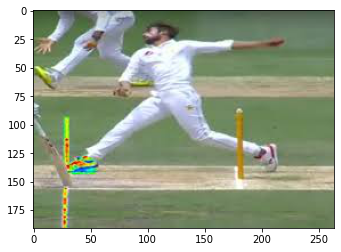

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
print("Example of Legal Ball")
img = imread('/content/drive/MyDrive/BALL/legal ball/images.jpg')
plt.imshow(img)

Example of No Ball


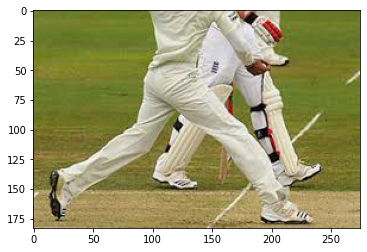

In [ ]:
print("Example of No Ball")
image = imread('/content/drive/MyDrive/BALL/no ball/52.jpg')
plt.imshow(image)

**Custom Made CNN Model-----**

In [ ]:
#CNN
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (64,64, 3), activation = 'relu'))
 
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (3, 3)))
 
# Adding a second convolutional layer
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))

# Adding a third convolutional layer
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# # Adding a fourth convolutional layer
# model.add(Convolution2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
model.add(Flatten())
 
# Step 4 - Full connection
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
 
#Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir =r'/content/drive/MyDrive/BALL'
datagen= ImageDataGenerator(rescale=1./255,
                                 validation_split=0.3)

**Split Dataset**

In [ ]:
train_generator = datagen.flow_from_directory(
        base_dir,  # This is the source directory for training images
        target_size=(64,64),  
        batch_size=1,
        subset='training',
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(64,64),
        batch_size=1,
        subset='validation',
        class_mode='binary')

Found 55 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


**Train Model--**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//1, 
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//1,  
      )

Epoch 1/50
55/55 [==============================] - 1s 21ms/step - loss: 0.5957 - accuracy: 0.8364 - val_loss: 0.7371 - val_accuracy: 0.4091
Epoch 2/50
55/55 [==============================] - 1s 19ms/step - loss: 0.2800 - accuracy: 0.8364 - val_loss: 0.7128 - val_accuracy: 0.6818
Epoch 3/50
55/55 [==============================] - 1s 19ms/step - loss: 0.2494 - accuracy: 0.9273 - val_loss: 0.8410 - val_accuracy: 0.5909
Epoch 4/50
55/55 [==============================] - 1s 18ms/step - loss: 0.2719 - accuracy: 0.9091 - val_loss: 0.3749 - val_accuracy: 0.7727
Epoch 5/50
55/55 [==============================] - 1s 18ms/step - loss: 0.1323 - accuracy: 0.9636 - val_loss: 0.3655 - val_accuracy: 0.8182
Epoch 6/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.4366 - val_accuracy: 0.8636
Epoch 7/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.8569 - val_accuracy: 0.8182
Epoch 8/50
55

**Evaluate Accuracy--**

In [ ]:
ans = model.evaluate(validation_generator)
print('Accuracy: %.2f' % (ans[1]*100))

22/22 [==============================] - 0s 11ms/step - loss: 1.2004 - accuracy: 0.8636
Accuracy: 86.36


In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
 
class_labels = {v: k for k, v in train_generator.class_indices.items()}
print(class_labels)

{0: 'legal ball', 1: 'no ball'}


**Predictions--**

ENTER FILE/content/drive/MyDrive/BALL/legal ball/11.jpg
[[0]]
It is a legal ball


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


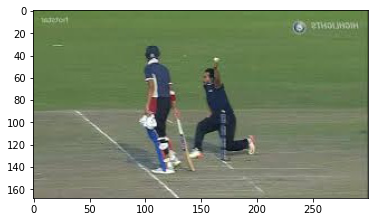

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load and prepare the image
def load_image(filename):
  # load the image
  img = load_img(filename, target_size=(64, 64))
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 3 channels
  img = img.reshape(1, 64, 64, 3)
  return img
 
# load an image and predict the class
def run_example(file):
  # load the image
  img = load_image(file)
  # predict the class
  result = model.predict_classes(img)
  if result[0][0]==1:
    print("It is a no ball")
  elif result[0][0]==0:
    print("It is a legal ball")

ar = input("ENTER FILE")
run_example(ar)
img = imread(ar)
plt.imshow(img)
  

ENTER FILE/content/drive/MyDrive/BALL/no ball/11.jpg
[[1]]
It is a no ball


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


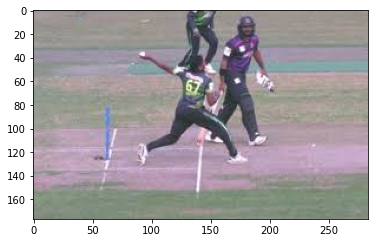

In [ ]:
ar = input("ENTER FILE")
run_example(ar)
img = imread(ar)
plt.imshow(img)

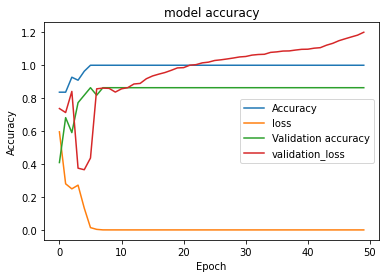

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss","Validation accuracy","validation_loss"])
plt.show()
